In [79]:
from numpy import linspace
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import linalg 
from numpy import multiply 
from numpy import concatenate
import math

In [80]:
def func1(v, t): #v = [x, y, vy]
    m = 88
    g = 9.8
    k = 0.5
    dvdt = (k/m)*(v[1]**2) - g
    dydt = v[1]
    return [dydt, dvdt]

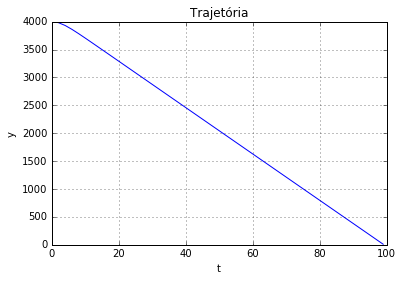

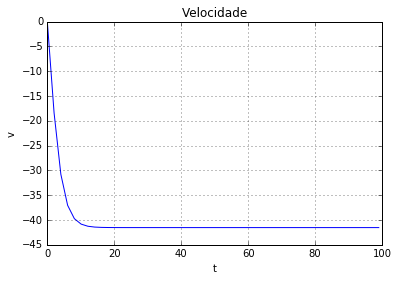

In [81]:
T = linspace(0,99)
v0 = [4000, 0]
y = odeint(func1,v0,T)
plt.plot(T, y[:,0])
plt.title('Trajetória')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

plt.plot(T, y[:,1])
plt.title('Velocidade')
plt.xlabel('t')
plt.ylabel('v')
plt.grid()
plt.show()

In [82]:
def modelo_adiabatico_temperatura_pressao_atmosfera():
    dtempdt = ((28.96 * 9.8)/1.01) * Vy
    densidade = (press * 28.96) / (0.082 * temp)
    dpressdt = - (P * 28.96 * 9.8 * Vy * math.e**((-28.96 * 9.8*dY)/(temp*0.082)))/ (0.082*temp)
    drag = 0.5 * dens * area * 1.5 * (v**2)
    return ddensdt

In [84]:
'''
def forca_de_resistencia_do_ar(Vetor_velocidade, drag):
    V_x = Vetor_velocidade[0]
    V_y = Vetor_velocidade[1]
    V = [V_x, V_y] #vetor velocidade resultante

    v = linalg.norm(V) #magnitude de V
    v_versor = V/v 
    
    F = multiply(-drag*(v**2), v_versor)
    return F
'''

#massa da pessoa em kg (70 kg) mais a massa do paraquedas em kg (18 kg) 
m = 88
#peso da pessoa em N:
P = 88*9.8

def func(A, t): #A = [x, y, Vx, Vy, press, temp, dens]
    
    V_x = A[0]
    V_y = A[1]
    V = [V_x, V_y] #vetor velocidade resultante
    v = linalg.norm(V) #magnitude de V
    v_versor = V/v 
    F = multiply(-drag*(v**2), v_versor)
    
    dxdt = A[2]
    dydt = A[3]
    dVxdt = F[0] / m
    dVydt = (F[1] - P) / m
    
    dpressdt = - (P * 28.96 * 9.8 * dVydt * math.e**((-28.96 * 9.8*dydt)/(dtempdt*0.082)))/ (0.082*dtempdt)
    dtempdt = ((28.96 * 9.8)/1.01) * dVydt
    ddensdt = (dpressdt * 28.96) / (0.082 * dtempdt)
    drag = 0.5 * ddensdt * 1.05 * 1.5
    
    return [dxdt, dydt, dVxdt, dVydt, dpressdt, dtempdt, ddensdt]

def func_paraquedas_abre(A, t): #A = [x, y, Vx, Vy, press, temp, dens]
    
    V_x = A[0]
    V_y = A[1]
    V = [V_x, V_y] #vetor velocidade resultante
    v = linalg.norm(V) #magnitude de V
    v_versor = V/v 
    F = multiply(-drag*(v**2), v_versor)
    
    dxdt = A[2]
    dydt = A[3]
    dVxdt = F[0] / m
    dVydt = (F[1] - P) / m
    
    dpressdt = - (P * 28.96 * 9.8 * dVydt * math.e**((-28.96 * 9.8*dydt)/(dtempdt*0.082)))/ (0.082*dtempdt)
    dtempdt = ((28.96 * 9.8)/1.01) * dVydt
    ddensdt = (dpressdt * 28.96) / (0.082 * dtempdt)
    drag = 0.5 * ddensdt * 10 * 1.5
    
    return [dxdt, dydt, dVxdt, dVydt, dpressdt, dtempdt, ddensdt]

#Condicões iniciais
#A = [x, y, Vx, Vy]
#x0 = 0
#y0 = 4000 #metros -- altitude
#Vx0 = 540 #metros por segundo
#Vy0 = 0

A0 = [0,4000,300,0,50, 63800, 273, 0.5]
T = linspace(0,55,46)
T2 = linspace(45,250,107)
M = odeint(func, A0, T, mxstep=500000000) 
l1 = M[-1,0]
l2 = M[-1,1]
l3 = M[-1,2]
l4 = M[-1,3]
l5 = M[-1,4]
l6 = M[-1,5]
l7 = M[-1,6]
A1 = [l1, l2, l3, l4, l5, l6, l7]
M2 = odeint(func_paraquedas_abre, A1, T2, mxstep=500000000)
T_final = concatenate((T, T2), axis=0)
M3 = concatenate((M, M2), axis = 0)

plt.plot(M3[:,0], M3[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajetória')
plt.grid()
plt.show() 

plt.plot(T_final, M3[:,3])
plt.xlabel('t')
plt.ylabel('v')
plt.title('Velocidade em y')
plt.grid()
plt.show() 

UnboundLocalError: local variable 'dVydt' referenced before assignment

In [ ]:
#slicing do numpy: dois pontos significa todas as linhas ou colunas
#exemplo: M[:,0] -- todas as linhas da coluna zero
#mais exemplo: M [:,1] -- todas as linhas da coluna 1